In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from scipy import optimize

In [2]:
%cd /content/

data = pd.read_csv('DATASETRAW1.csv',delimiter=',')  #este dataset es el que tiene las etiquetas
data

/content


,Marca,"Modelo (Ej: 2021, 2016)",Número de puertas,Número de asientos,Condición del vehículo,Tipo,Transmisión,Tipo de Combustible,Kilometraje (recorrido en Km),Color,Procedencia,Cilindrada (en cc),Estado de la pintura,¿La pintura está en buen estado?,¿El vehículo tuvo algún accidente?,¿El vehículo cuenta con todos los accesorios?,Costo en $us
0,12,2017,5,5,3,2,1,1,42397.0,4,4,1200,1,1,2,2,27000.0
1,12,2013,4,5,2,2,1,1,60.0,14,3,3500,1,1,2,2,21500.0
2,19,2019,5,12,2,4,1,1,0.0,7,3,3700,1,1,2,2,37800.0
3,30,2020,2,3,2,1,1,3,850.0,14,4,800,1,1,2,2,3900.0
4,10,2001,5,5,3,2,1,1,24900.0,10,4,3000,1,1,2,2,10500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,12,1997,3,4,3,3,2,2,183000.0,7,2,4200,1,1,2,1,13800.0
931,26,2009,5,4,3,2,1,1,200000.0,14,2,2400,2,1,2,1,13000.0
932,17,1992,5,4,3,1,2,1,300.0,7,3,1600,2,1,2,2,5000.0
933,13,2012,5,4,2,2,1,1,90000.0,7,2,2967,2,1,2,2,24900.0


In [3]:
data = pd.DataFrame(data)
data_num=data.to_numpy()


In [147]:

#eliminando datos faslsos o forzados
def borrarFalsos(matriz):
  c=0
  for i in matriz[:,11]:
    if i < 700 or i >8000:
      matriz=np.delete(matriz,c,axis=0)
    c=c+1

  k=0
  for i in matriz[:,16]:
    if i <5000:
      matriz=np.delete(matriz,k,axis=0)
    k=k+1 
  return matriz

#asignando x y
data1=borrarFalsos(data_num)
x=data1[:,:16]
y=data1[:,16]
m, n = x.shape
#x = np.concatenate([np.ones((m, 1)), x], axis=1)
print(m,n)
print(x.shape)


908 16
(908, 16)


In [39]:
def  featureNormalize(x):
    x_norm = x.copy()
    mu = np.zeros(x.shape[1])
    sigma = np.zeros(x.shape[1])

    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x - mu) / sigma
    
    return x_norm

In [148]:
x_original =data1[:,:16]
array_norm = featureNormalize(data1)
y=array_norm[:,16]
x=featureNormalize(x_original)
x_original = np.c_[np.ones(len(x)), x_original]
x = np.c_[np.ones(len(x)), x]
print(x.shape)
print(x_original.shape)
print(x[0])

(908, 17)
(908, 17)
[ 1.         -0.35399406  0.63225172  0.78747785  0.38074785  0.73932182
  0.41880906 -0.82929629 -0.14850459 -0.07127004 -0.67535845  0.62019656
 -0.59169347 -0.36742346 -0.28901941  0.34981895  1.83449846]


In [82]:
def computeCostMulti(x, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(x, theta)
    J = (1/(2 * m)) * np.sum(np.power((h - y),2))    
    return J

In [83]:
def gradientDescentMulti(x, y, theta, alpha, num_iters):   
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * np.sum((np.dot(x, theta) - y).dot(x))
        J_history.append(computeCostMulti(x, y, theta))
    
    return theta, J_history

In [84]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [149]:
alpha = 0.001
num_iters = 1000
theta = np.zeros(17)
#np.around(x,3)
theta, J_history = gradientDescentMulti(x, y, theta, alpha, num_iters)
print('Theta optimo: ',theta)
mejor_costo= computeCostMulti(x,y,theta)
print('Mejor costo: ',mejor_costo)
#thetaNormal=normalEqn(x,y)
#print(thetaNormal)

Theta optimo:  [-0.01197286 -0.01197286 -0.01197286 -0.01197286 -0.01197286 -0.01197286
 -0.01197286 -0.01197286 -0.01197286 -0.01197286 -0.01197286 -0.01197286
 -0.01197286 -0.01197286 -0.01197286 -0.01197286 -0.01197286]
Mejor costo:  0.4987262744691522


In [150]:
y_original=data1[:,16]
thetaNormal=normalEqn(x_original,y_original)
#thetaNormal=normalEqn(x,y)
print(thetaNormal)
costonorm=computeCostMulti(x_original,y_original,thetaNormal)
#costonorm=computeCostMulti(x,y,thetaNormal)
print(costonorm)

[-6.77427409e+05 -1.98976110e+02  3.48369863e+02 -7.20772380e+01
  1.47690309e+03 -3.24573221e+03  2.97432062e+03 -3.76795988e+03
  4.67572755e+03 -7.81774728e-04  3.00387346e+00 -2.47947284e+01
  3.68939268e-01 -3.12078860e+02 -2.05111189e+03  1.72059011e+03
 -2.64901827e+03]
62619070.71665856


Text(0, 0.5, 'Costo J')

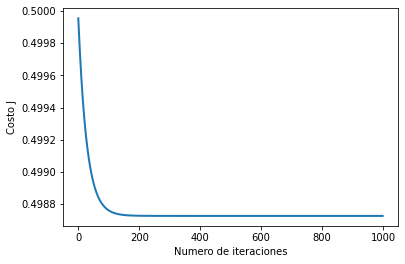

In [151]:
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [152]:
x_test= np.array([1,17,2020,5,5,2,2,1,1,11000,10,2,3000,1,1,2,1])
#x_testn=np.array([x_test,x_test])
#x_testn=featureNormalize(x_test)
price= np.dot(x_test,thetaNormal)
#print(price)
print('Precio predecido: ${:.0f}'.format(price))
print('Precio real: $',80000)

Precio predecido: $29794
Precio real: $ 80000


In [93]:
def predict_accuracy(x, y,theta):
  m=y.shape[0]
  h=np.dot(x,theta)
  difp=np.sum(np.absolute(h-y)*100/y)
  
  p=100-difp/m
  return p

In [142]:
p=predict_accuracy(x,y,theta)
print('Precisión de entrenamiento: {:.2f} %'.format(p))
print('Precisión esperada (aproximadamente): 95.00 %')

Precisión de entrenamiento: 94.32 %
Precisión esperada (aproximadamente): 95.00 %
